In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Ensure nltk resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Import datasets
data=pd.read_csv('voice_intents_dataset.csv')
data.head()

,Command Text,Intent
0,Play some jazz music,PlayMusic
1,Play my favorite songs,PlayMusic
2,Start playing music,PlayMusic
3,Turn on some rock music,PlayMusic
4,Play the latest hits,PlayMusic


In [4]:
# Preprocessing Function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r"[^a-zA-Z0-9 ]", "", text)  # Remove special chars
    words = text.split()
    words = [w for w in words if w not in stop_words]  # Remove stopwords
    return " ".join(words)

In [5]:
# Apply preprocessing
data['clean_text'] = data['Command Text'].apply(preprocess_text)

In [6]:
# Train-Test Split
X = data['Command Text']
y = data['Intent']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [9]:
# Train Classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [10]:
# Evaluation
y_pred = clf.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

 CallContact       1.00      1.00      1.00         1
     GetTime       1.00      1.00      1.00         2
  GetWeather       1.00      1.00      1.00         3
   PlayMusic       1.00      1.00      1.00         4
 SendMessage       1.00      1.00      1.00         4
    SetAlarm       1.00      1.00      1.00         5

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [12]:
#SVM
svm_clf = SVC(kernel="linear", probability=True)
svm_clf.fit(X_train_tfidf, y_train)
y_pred_svm = svm_clf.predict(X_test_tfidf)

print("\nSVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))



SVM Results:
Accuracy: 1.0
              precision    recall  f1-score   support

 CallContact       1.00      1.00      1.00         1
     GetTime       1.00      1.00      1.00         2
  GetWeather       1.00      1.00      1.00         3
   PlayMusic       1.00      1.00      1.00         4
 SendMessage       1.00      1.00      1.00         4
    SetAlarm       1.00      1.00      1.00         5

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



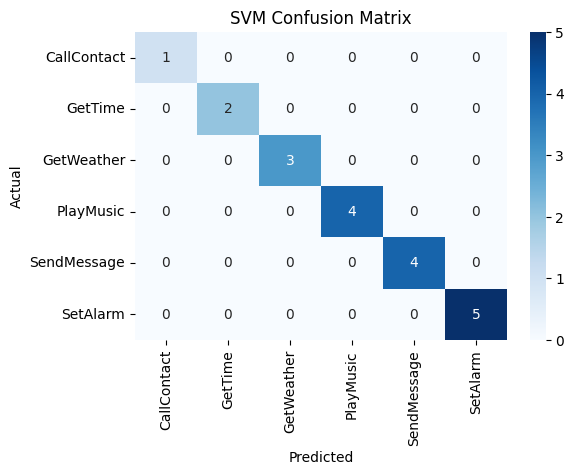

In [26]:
# Confusion Matrix for SVM
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=svm_clf.classes_, yticklabels=svm_clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

In [14]:
# Prediction function
def predict_intent(command):
    cleaned = preprocess_text(command)
    vectorized = vectorizer.transform([cleaned])
    intent_lr = clf.predict(vectorized)[0]
    intent_svm = svm_clf.predict(vectorized)[0]
    return intent_lr, intent_svm

In [15]:
# Test
sample = "I want to wake in morning , remind me to wake 7 am"
intent_lr, intent_svm = predict_intent(sample)
print(f"\nInput: {sample}")
print(f"Logistic Regression Prediction: {intent_lr}")
print(f"SVM Prediction: {intent_svm}")


Input: I want to wake in morning , remind me to wake 7 am
Logistic Regression Prediction: SetAlarm
SVM Prediction: SetAlarm
